# Simple Linear Regression for Salary prediction

In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/angelomartinezc/supervised_learning/main/simple_linear_regression/salary_prediction/Salary_Data.csv')

## Exploratory Data Analysis

In [3]:
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [5]:
df.shape

(30, 2)

In [6]:
df.Salary.describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

The mean is greater than median that means the bias at the right.

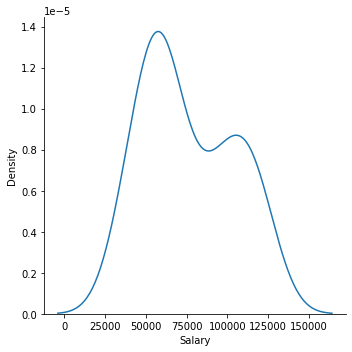

In [14]:
sns.displot(df, x = "Salary", kind='kde')

In [15]:
df.YearsExperience.describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

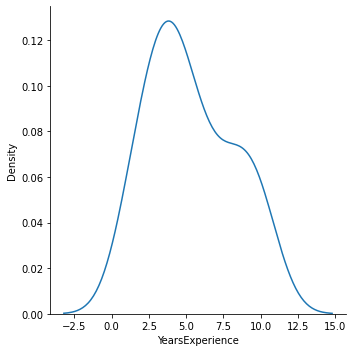

In [18]:
sns.displot(df, x = "YearsExperience", kind='kde')

<AxesSubplot:xlabel='Salary', ylabel='YearsExperience'>

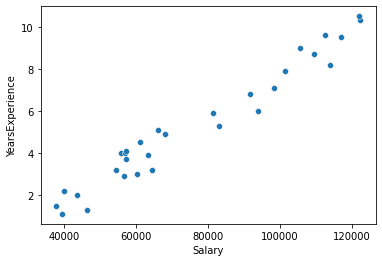

In [19]:
sns.scatterplot(data=df, x='Salary', y='YearsExperience')

In [20]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


## Train train split

In [72]:
x = df[['YearsExperience']].to_numpy()
y = df[['Salary']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, random_state = 100)

## Linea Regression Model

In [63]:
lr = LinearRegression()

In [64]:
X_train.describe()

,YearsExperience
count,24.000000
mean,5.204167
std,2.791677
min,1.100000
25%,3.150000
50%,5.000000
75%,7.300000
max,10.500000


In [65]:
X_test.describe()

,YearsExperience
count,6.000000
mean,5.750000
std,3.251923
min,2.900000
25%,3.775000
50%,4.050000
75%,8.150000
max,10.300000


In [74]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [77]:
y_pred = lr.predict(X_test)

Text(0.5, 1.0, 'Prediction')

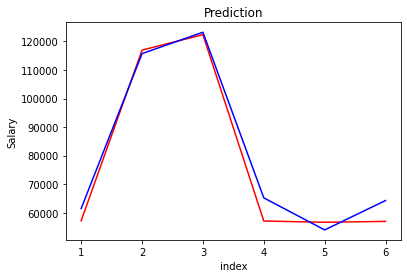

In [89]:
c = [i for i in range(1, len(y_test) + 1)]
plt.plot(c, y_test, color='r')
plt.plot(c, y_pred, color='b')
plt.xlabel('index')
plt.ylabel('Salary')
plt.title("Prediction")

## Evaluating the model

Text(0, 0.5, 'Error')

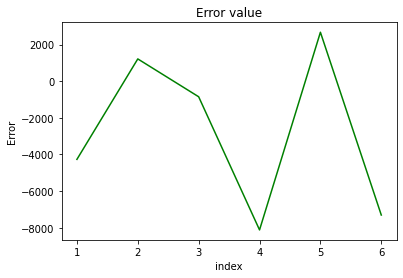

In [90]:
# plotting the error
plt.plot(c, y_test - y_pred, color = 'green')
plt.title("Error value")
plt.xlabel('index')
plt.ylabel('Error')

#### VARIANCE
Is a measure of how far observed values differ from the average of predicted values. The difference from the predicted value mean. The goal is to have a value that is low and r2 score help to handle it.

#### MEAN SQUARE ERROR
MSE is the average of the square of the errors. The larger the number the larger the error. 
Error in this case means the difference between the observed values y1, y2, y3, … and the predicted ones pred(y1), pred(y2), pred(y3), … 
We square each difference (pred(yn) – yn)) ** 2 so that negative and positive values do not cancel each other out.

#### R2 SCORE
The r2 score varies between 0 and 1. Is the total variance explained by model. So if it is close 1 the two variables are perfectly correlated (with no variance at all). A low value would show a low level of correlation, meaning a regression model that is not valid. 

In [97]:
mse = mean_squared_error(y_test, y_pred)
print('The Mean Squared error is: {}'.format(round(mse, 3)))

The Mean Squared error is: 24477109.09


In [98]:
r2 = r2_score(y_test, y_pred)
print('The R square error is: {}'.format(round(r2, 2)))

The R square error is: 0.97


In [110]:
print('Intercept of the model: {}'.format(round(float(lr.intercept_), 2)))
print('Coefficient of the line: {}'.format(round(float(lr.coef_), 2)))

Intercept of the model: 26819.07
Coefficient of the line: 9361.12


In [108]:
print('Y = {} + {} * x'.format(round(float(lr.intercept_), 2), round(float(lr.coef_), 2)))

Y = 26819.07 + 9361.12 * x


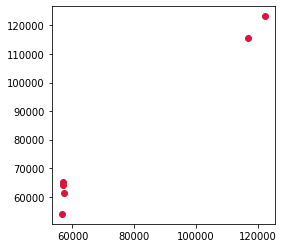

In [114]:
plt.figure(figsize=(4, 4))
plt.scatter(y_test, y_pred, c='crimson')